In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
# Load data from CSV
df = pd.read_csv('C:\\repos\\python\\Bacteria_counter\\VALIDATION-panel_request\\bacterial_colony_counts.csv')

# Initialize variables for True Positives (TP), False Positives (FP), and False Negatives (FN)
true_positive = np.minimum(df['detected colonies'], df['expert count (annotation)']).sum()
false_negative = (df['expert count (annotation)'] - df['detected colonies']).clip(lower=0).sum()
false_positive = (df['detected colonies'] - df['expert count (annotation)']).clip(lower=0).sum()

In [24]:
# Create a confusion matrix as a NumPy array
conf_matrix = np.array([
    [true_positive, false_negative],  # [TP, FN]
    [false_positive, 0]               # [FP, TN]
])

# Define labels for the confusion matrix
labels = ['Colony', 'Not Colony']

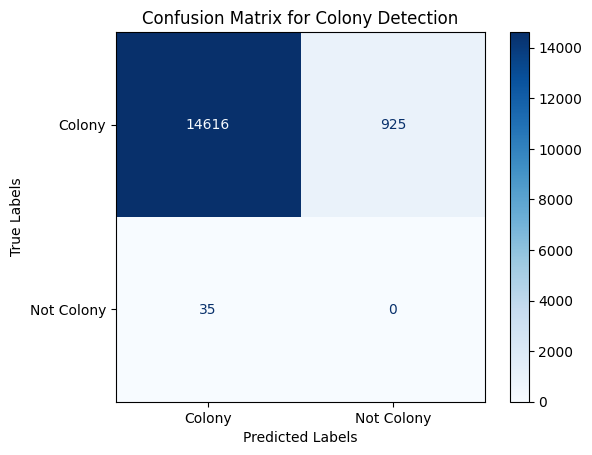

In [25]:
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Colony Detection')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [26]:
# Define bins and labels for the count range from 0 to 300 with increasing intervals
bins = [0, 10, 30, 60, 100, 150, 200, 300, np.inf]
labels = ['0-10', '11-30', '31-60', '61-100', '101-150', '151-200', '201-300', '300 and above']

In [27]:
# Convert counts to classes based on the defined bins
df['detected_class'] = pd.cut(df['detected colonies'], bins=bins, labels=labels)
df['expert_class'] = pd.cut(df['expert count (annotation)'], bins=bins, labels=labels)

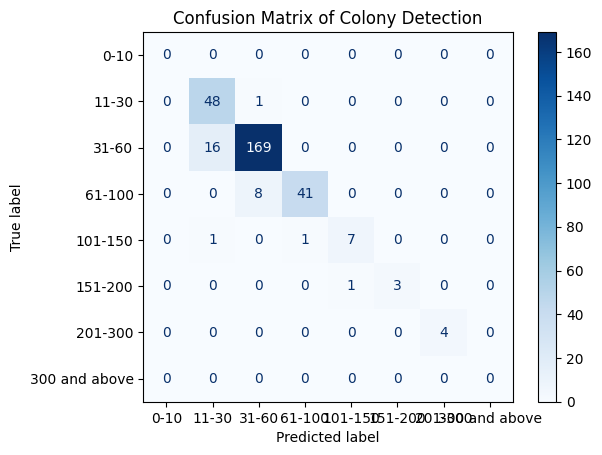

In [28]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(df['expert_class'], df['detected_class'], labels=labels)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix of Colony Detection')
plt.show()